In [ ]:
# Portfolio Optimization
# By: Pratham Brahmbhatt

Portfolio Optimization with Predictive Analytics

Project Scope and Objectives
- Objective: Forecast AAPL stock prices using historical data and predictive models.
- Focus: Single-stock analysis (AAPL) with an aim to optimize investment decisions.
- Outcome: A comprehensive analysis with predictive models and visualizations.


# Data Preparation and Exploration

In [1]:
# Step 1: Loading the Dataset

import pandas as pd

# Load the AAPL stock data from the provided CSV file
df = pd.read_csv('AAPL_stock.csv', index_col='Date', parse_dates=True)

# Display the first few rows to verify the data is loaded correctly
print("First few rows of the dataset:")
df.head()


/Users/ptb/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


First few rows of the dataset:


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600


In [2]:
# Step 2: Handling Missing Values

# Check for missing values in the dataset
print("\nChecking for missing values:")
print(df.isnull().sum())

# Drop rows with any missing values (if any)
df_cleaned = df.dropna()

# Verify that missing values are handled
print("\nData after handling missing values:")
df_cleaned.isnull().sum()



Checking for missing values:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Data after handling missing values:


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [3]:
# Step 3: Calculating Basic Statistics

# Calculate basic statistics like mean, median, standard deviation, etc.
print("\nBasic statistics of the dataset:")
df_cleaned.describe()



Basic statistics of the dataset:


,Open,High,Low,Close,Adj Close,Volume
count,10954.000000,10954.000000,10954.000000,10954.000000,10954.000000,1.095400e+04
mean,21.530877,21.761904,21.308220,21.544072,20.747506,3.190792e+08
std,44.458386,44.931856,44.013578,44.492483,44.038943,3.357446e+08
min,0.049665,0.049665,0.049107,0.049107,0.037900,0.000000e+00
25%,0.296875,0.303571,0.290179,0.296875,0.241624,1.139936e+08
50%,0.522321,0.533482,0.513393,0.524554,0.427333,2.067128e+08
75%,19.767500,19.888572,19.457768,19.682679,17.048054,3.993444e+08
max,198.020004,199.619995,197.000000,198.110001,197.589523,7.421641e+09


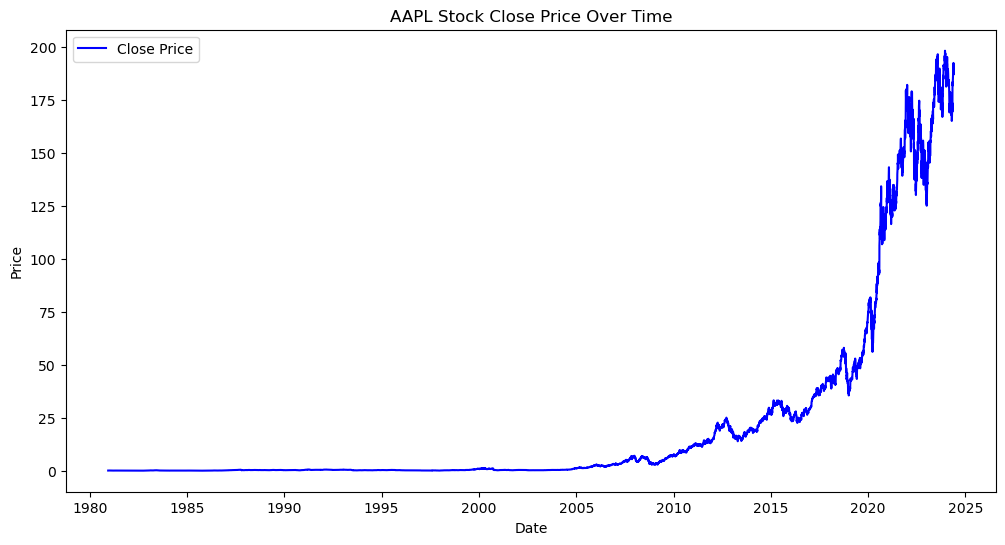

In [4]:
# Step 4: Visualizing the Stock Price Over Time

import matplotlib.pyplot as plt

# Plot the 'Close' price over time
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned.index, df_cleaned['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Stock Close Price Over Time')
plt.legend()
plt.show()


In [5]:
# Step 5: Calculating Moving Averages

# Calculate the 50-day moving average
df_cleaned['MA50'] = df_cleaned['Close'].rolling(window=50).mean()

# Calculate the 200-day moving average
df_cleaned['MA200'] = df_cleaned['Close'].rolling(window=200).mean()

# Display the first few rows to verify the moving averages
print("\nData with moving averages:")
df_cleaned[['Close', 'MA50', 'MA200']].head()



Data with moving averages:


,Close,MA50,MA200
Date,,,
1980-12-12,0.128348,NaN,NaN
1980-12-15,0.121652,NaN,NaN
1980-12-16,0.112723,NaN,NaN
1980-12-17,0.115513,NaN,NaN
1980-12-18,0.118862,NaN,NaN


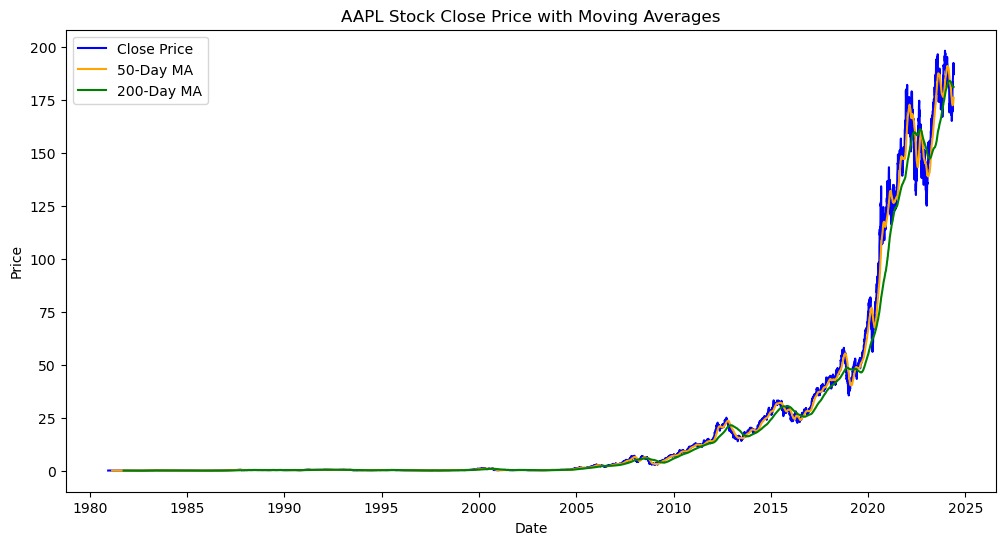

In [6]:
# Step 6: Visualizing Moving Averages

# Plot the 'Close' price along with the 50-day and 200-day moving averages
plt.figure(figsize=(12, 6))
plt.plot(df_cleaned.index, df_cleaned['Close'], label='Close Price', color='blue')
plt.plot(df_cleaned.index, df_cleaned['MA50'], label='50-Day MA', color='orange')
plt.plot(df_cleaned.index, df_cleaned['MA200'], label='200-Day MA', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AAPL Stock Close Price with Moving Averages')
plt.legend()
plt.show()


# Feature Engineering

In [7]:
# Step 1: Calculating Additional Technical Indicators

# We'll calculate more technical indicators commonly used in stock analysis

# 1.1 Calculate Daily Returns
df_cleaned['Daily_Return'] = df_cleaned['Close'].pct_change()

# 1.2 Calculate Volatility (Rolling Standard Deviation)
df_cleaned['Volatility'] = df_cleaned['Daily_Return'].rolling(window=21).std()  # 21 trading days ~ 1 month

# 1.3 Calculate Relative Strength Index (RSI)
def calculate_RSI(data, window):
    delta = data.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    RS = gain / loss
    RSI = 100 - (100 / (1 + RS))
    return RSI

df_cleaned['RSI'] = calculate_RSI(df_cleaned['Close'], window=14)  # 14-day RSI

# 1.4 Calculate Moving Average Convergence Divergence (MACD)
df_cleaned['MACD'] = df_cleaned['Close'].ewm(span=12, adjust=False).mean() - df_cleaned['Close'].ewm(span=26, adjust=False).mean()

# 1.5 Calculate Signal Line (9-Day EMA of MACD)
df_cleaned['Signal_Line'] = df_cleaned['MACD'].ewm(span=9, adjust=False).mean()

# Display the first few rows to verify the new features
print("Data with additional technical indicators:")
df_cleaned[['Close', 'Daily_Return', 'Volatility', 'RSI', 'MACD', 'Signal_Line']].head()


Data with additional technical indicators:


,Close,Daily_Return,Volatility,RSI,MACD,Signal_Line
Date,,,,,,
1980-12-12,0.128348,NaN,NaN,NaN,0.000000,0.000000
1980-12-15,0.121652,-0.052171,NaN,NaN,-0.000534,-0.000107
1980-12-16,0.112723,-0.073398,NaN,NaN,-0.001659,-0.000417
1980-12-17,0.115513,0.024751,NaN,NaN,-0.002299,-0.000793
1980-12-18,0.118862,0.028992,NaN,NaN,-0.002506,-0.001136


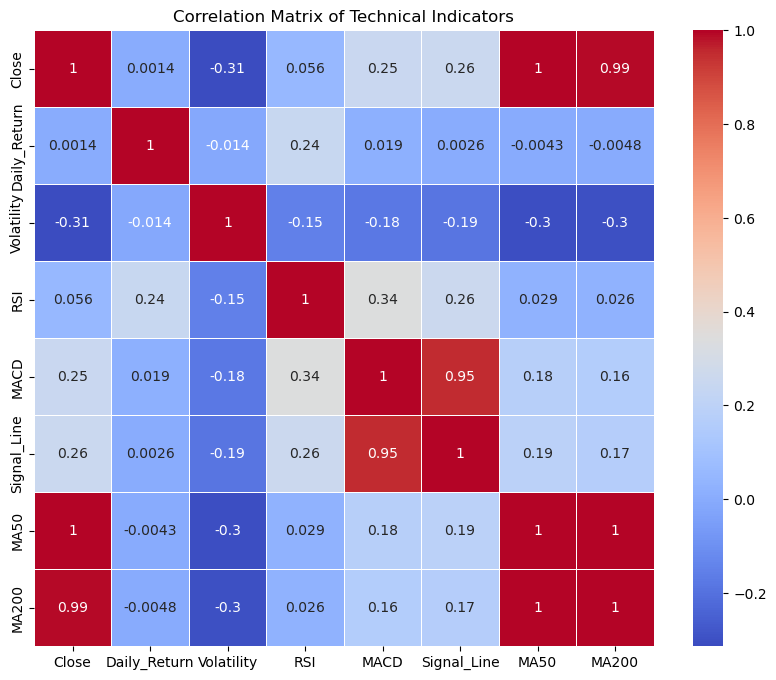


Correlation Matrix:


,Close,Daily_Return,Volatility,RSI,MACD,Signal_Line,MA50,MA200
Close,1.000000,0.001428,-0.312902,0.055875,0.246120,0.255658,0.997299,0.992260
Daily_Return,0.001428,1.000000,-0.013530,0.243605,0.019426,0.002563,-0.004276,-0.004849
Volatility,-0.312902,-0.013530,1.000000,-0.152469,-0.177706,-0.189117,-0.304111,-0.299181
RSI,0.055875,0.243605,-0.152469,1.000000,0.339827,0.256584,0.029379,0.025591
MACD,0.246120,0.019426,-0.177706,0.339827,1.000000,0.952558,0.176844,0.160847
Signal_Line,0.255658,0.002563,-0.189117,0.256584,0.952558,1.000000,0.191608,0.167754
MA50,0.997299,-0.004276,-0.304111,0.029379,0.176844,0.191608,1.000000,0.995903
MA200,0.992260,-0.004849,-0.299181,0.025591,0.160847,0.167754,0.995903,1.000000


In [8]:
# Step 2: Exploring Feature Importance and Correlation

import seaborn as sns
import matplotlib.pyplot as plt

# 2.1 Calculate the correlation matrix
correlation_matrix = df_cleaned[['Close', 'Daily_Return', 'Volatility', 'RSI', 'MACD', 'Signal_Line', 'MA50', 'MA200']].corr()

# 2.2 Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Technical Indicators')
plt.show()

# 2.3 Display the correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix


In [9]:
# Step 3: Dropping or Refining Features

# Based on the correlation analysis, you may decide to drop or refine features.

# For example, if 'Volatility' and 'Daily_Return' are highly correlated, you might choose to keep only one.
# Let's assume we decide to keep all features for now.

# Dropping rows with any missing values (again, since new features may introduce NaNs)
df_final = df_cleaned.dropna()

# Display the final dataset with selected features
print("\nFinal dataset with selected features:")
df_final.head()



Final dataset with selected features:


,Open,High,Low,Close,Adj Close,Volume,MA50,MA200,Daily_Return,Volatility,RSI,MACD,Signal_Line
Date,,,,,,,,,,,,,
1981-09-28,0.064174,0.064732,0.064174,0.064174,0.049529,91728000,0.094687,0.118125,0.008771,0.039391,7.842586,-0.007748,-0.006335
1981-09-29,0.067522,0.068080,0.067522,0.067522,0.052113,94684800,0.093884,0.117821,0.052171,0.039381,17.542757,-0.007814,-0.006631
1981-09-30,0.068080,0.068638,0.068080,0.068080,0.052543,49996800,0.093103,0.117553,0.008264,0.039555,17.542757,-0.007732,-0.006851
1981-10-01,0.068080,0.068638,0.068080,0.068080,0.052543,61129600,0.092444,0.117330,0.000000,0.035859,18.180633,-0.007579,-0.006997
1981-10-02,0.073661,0.074219,0.073661,0.073661,0.056851,45046400,0.091841,0.117120,0.081977,0.041173,33.334329,-0.006928,-0.006983


# Model Building and Training

In [18]:
# Step 1: Splitting the Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
# We'll use all the engineered features except the target variable 'Close'
features = ['MA50', 'MA200', 'Daily_Return', 'Volatility', 'RSI', 'MACD', 'Signal_Line']
X = df_final[features]
y = df_final['Close']

# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Display the shapes of the resulting datasets
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")


Training set shape: X_train=(8604, 7), y_train=(8604,)
Testing set shape: X_test=(2151, 7), y_test=(2151,)


In [19]:
# Step 2: Scaling the Features

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first few rows of the scaled training data to verify
print("\nFirst few rows of the scaled training data:")
pd.DataFrame(X_train_scaled, columns=features).head()



First few rows of the scaled training data:


,MA50,MA200,Daily_Return,Volatility,RSI,MACD,Signal_Line
0,-0.522498,-0.516871,0.256188,0.989884,-2.603120,-0.195134,-0.194878
1,-0.522609,-0.516916,1.718038,0.989061,-2.041004,-0.195547,-0.196842
2,-0.522717,-0.516956,0.239097,1.002924,-2.041004,-0.195030,-0.198304
3,-0.522808,-0.516989,-0.039265,0.709449,-2.004040,-0.194070,-0.199271
4,-0.522891,-0.517020,2.722029,1.131392,-1.125897,-0.189967,-0.199181


In [20]:
# Step 3: Training a Simple Model (Linear Regression)

from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Display the coefficients of the model
print("\nModel coefficients:")
print(dict(zip(features, model.coef_)))



Model coefficients:
{'MA50': 7.288227088761167, 'MA200': -0.04642070636907579, 'Daily_Return': 0.03481559469794267, 'Volatility': -0.0015435607979852237, 'RSI': -0.006583861127274432, 'MACD': 0.6828902630181523, 'Signal_Line': -0.1426481501835872}


In [21]:
# Step 4: Evaluating the Model

from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")



Mean Squared Error (MSE): 3.53
R-squared (R2): 1.00


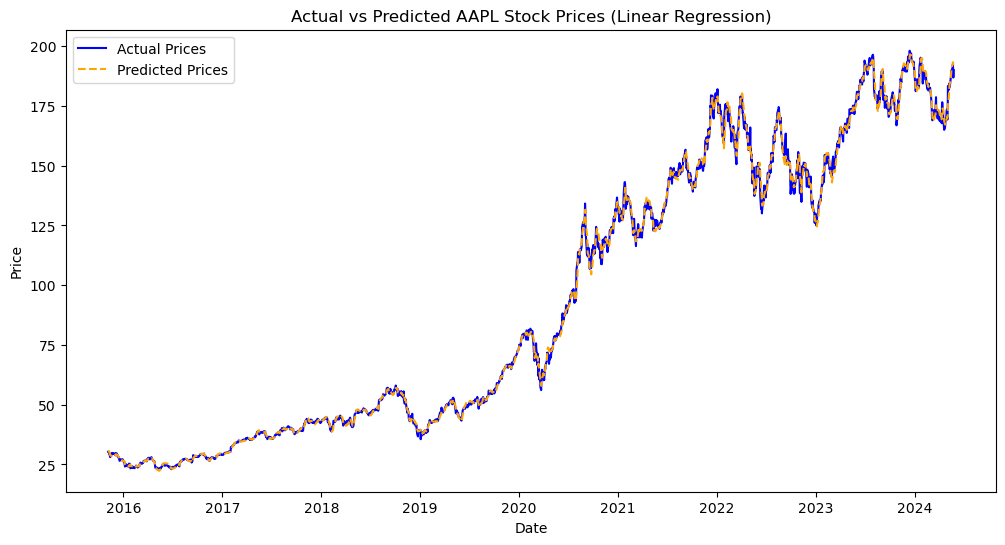

In [22]:
# Step 5: Visualizing the Model's Predictions

import matplotlib.pyplot as plt

# Plot the actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Prices', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted AAPL Stock Prices (Linear Regression)')
plt.legend()
plt.show()


In [23]:
# Step 6: Experimenting with a More Complex Model (Random Forest)

from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Predict on the test set using Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)

# Calculate and display the evaluation metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nRandom Forest - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest - R-squared (R2): {r2_rf:.2f}")



Random Forest - Mean Squared Error (MSE): 7379.77
Random Forest - R-squared (R2): -1.20


# Future Stock Price Prediction 

In [32]:
# Step 1: Retraining the Model on the Entire Dataset

# Use the entire dataset to retrain the model for future predictions
X_full = df_final[features]
y_full = df_final['Close']

# Scale the entire dataset using the previously fitted scaler
X_full_scaled = scaler.fit_transform(X_full)

# Retrain the Linear Regression model on the entire dataset
model.fit(X_full_scaled, y_full)

# Retrain the Random Forest model on the entire dataset
rf_model.fit(X_full_scaled, y_full)

print("Models retrained on the entire dataset for future predictions.")


Models retrained on the entire dataset for future predictions.


In [33]:
# Step 2: Generating Future Dates for Prediction

# Define the number of future days you want to predict
forecast_days = 30

# Generate future dates (this assumes daily frequency)
# Replace 'closed' with 'inclusive'
last_date = df_final.index[-1]
future_dates = pd.date_range(last_date, periods=forecast_days + 1, inclusive='right')

# Create a DataFrame to store future predictions
future_df = pd.DataFrame(index=future_dates)

print(f"\nFuture dates generated from {last_date} to {future_dates[-1]}.")



Future dates generated from 2024-05-24 00:00:00 to 2024-06-23 00:00:00.


In [34]:
# Step 3: Preparing Future Data for Prediction

# Copy the last row of the current data as the starting point for future predictions
last_row = df_final.iloc[-1][features]

# Repeat the last row for the number of future days to predict
future_data = pd.DataFrame([last_row] * forecast_days, index=future_dates, columns=features)

# Scale the future data
future_data_scaled = scaler.transform(future_data)

print("\nFuture data prepared and scaled for prediction.")



Future data prepared and scaled for prediction.


In [35]:
# Step 4: Predicting Future Stock Prices

# Predict future prices using both models
future_df['Predicted_Close_LR'] = model.predict(future_data_scaled)  # Using Linear Regression
future_df['Predicted_Close_RF'] = rf_model.predict(future_data_scaled)  # Using Random Forest

# Display the first few future predictions
print("\nFuture stock price predictions (first few days):")
print(future_df.head())



Future stock price predictions (first few days):
            Predicted_Close_LR  Predicted_Close_RF
2024-05-25          191.513565          189.594298
2024-05-26          191.513565          189.594298
2024-05-27          191.513565          189.594298
2024-05-28          191.513565          189.594298
2024-05-29          191.513565          189.594298


In [40]:
print(future_df[['Predicted_Close_LR', 'Predicted_Close_RF']])


            Predicted_Close_LR  Predicted_Close_RF
2024-05-25          191.513565          189.594298
2024-05-26          191.513565          189.594298
2024-05-27          191.513565          189.594298
2024-05-28          191.513565          189.594298
2024-05-29          191.513565          189.594298
2024-05-30          191.513565          189.594298
2024-05-31          191.513565          189.594298
2024-06-01          191.513565          189.594298
2024-06-02          191.513565          189.594298
2024-06-03          191.513565          189.594298
2024-06-04          191.513565          189.594298
2024-06-05          191.513565          189.594298
2024-06-06          191.513565          189.594298
2024-06-07          191.513565          189.594298
2024-06-08          191.513565          189.594298
2024-06-09          191.513565          189.594298
2024-06-10          191.513565          189.594298
2024-06-11          191.513565          189.594298
2024-06-12          191.513565 

# Risk Management

Step 1: Calculate Key Risk Metrics

In [41]:
# Step 1.1: Calculating Value at Risk (VaR)

import numpy as np

# Calculate daily returns
df_final['Daily_Return'] = df_final['Close'].pct_change()

# Calculate the Value at Risk (VaR) at a 95% confidence level
VaR_95 = np.percentile(df_final['Daily_Return'].dropna(), 5)

# Display the VaR
print(f"Value at Risk (VaR) 95%: {VaR_95:.4f}")


Value at Risk (VaR) 95%: -0.0403


/var/folders/62/mvj95ht93jb_vys63ypv4mmc0000gn/T/ipykernel_93239/228190775.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Daily_Return'] = df_final['Close'].pct_change()


In [42]:
# Step 1.2: Calculating the Sharpe Ratio

# Assume an annual risk-free rate of 1%
risk_free_rate = 0.01  

# Calculate the Sharpe Ratio
sharpe_ratio = (df_final['Daily_Return'].mean() - risk_free_rate / 252) / df_final['Daily_Return'].std()

# Display the Sharpe Ratio
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")


Sharpe Ratio: 0.0395


Step 2: Scenario Analysis and Stress Testing

In [43]:
# Step 2.1: Performing Scenario Analysis

# Example scenario: Simulate a market crash
# Assume a market crash as a drop of 3 standard deviations below the mean
market_crash_return = df_final['Daily_Return'].mean() - 3 * df_final['Daily_Return'].std()

# Display the simulated market crash return
print(f"Simulated Market Crash Return: {market_crash_return:.4f}")


Simulated Market Crash Return: -0.0822


In [44]:
# Step 2.2: Performing Stress Testing

# Example stress test: Calculate the portfolio value after a market crash
# Assuming an initial portfolio value (e.g., $1,000,000)
initial_portfolio_value = 1000000

# Calculate the portfolio value after a simulated market crash
portfolio_value_after_crash = initial_portfolio_value * (1 + market_crash_return)

# Display the portfolio value after the stress test
print(f"Portfolio Value After Market Crash: ${portfolio_value_after_crash:,.2f}")


Portfolio Value After Market Crash: $917,786.77
